In [14]:
%run ../../__init__.py
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
htune_dir = "/home/konstantin/personal/Summertime/runs/htune/hpatches/"
evaluation_task = eva_ns.REL_POSE

In [16]:
methods = {    
    'shi_disk': {eva_ns.COLOR: 'lightskyblue',  
                 eva_ns.LINE_STYLE: '-.',
                 eva_ns.ALIAS: 'Shi-Tomasi+DISK'},
    
    'sift_disk': {eva_ns.COLOR: 'orange',
                  eva_ns.LINE_STYLE: '-',
                  eva_ns.ALIAS: 'SIFT+DISK'},
    
    'superpoint_disk': {eva_ns.COLOR: 'gold',
                        eva_ns.LINE_STYLE: '-',
                        eva_ns.ALIAS: 'SuperPoint+DISK'},
    
    'r2d2_disk': {eva_ns.COLOR: 'blue',
                  eva_ns.LINE_STYLE: '-',
                  eva_ns.ALIAS: 'R2D2+DISK'},
    
    'keynet_disk': {eva_ns.COLOR: 'red',
                    eva_ns.LINE_STYLE: '-',
                    eva_ns.ALIAS: 'KeyNet+DISK'},
    
    'disk': {eva_ns.COLOR: 'purple',
             eva_ns.LINE_STYLE: '-',
             eva_ns.ALIAS: 'DISK'},
    
    'rekd_disk': {eva_ns.COLOR: 'hotpink',
                  eva_ns.LINE_STYLE: '-',
                  eva_ns.ALIAS: 'REKD+DISK'},
    
    'shiness_disk': {eva_ns.COLOR: 'cyan',
                     eva_ns.LINE_STYLE: '-',
                     eva_ns.ALIAS: 'NeSS-ST+DISK'},
}

In [17]:
methods_disk_h_opencv = {
    eva_ns.BACKEND: 'h_opencv/2k',
    eva_ns.EVAL_TAG: eva_ns.ICCV2023_EVAL_TAG,
    
    eva_ns.METHODS: methods,
    
    eva_ns.PLOT_PARAMS: {
        eva_ns.PLOT_TITLE: 'HParam tuning. OpenCV, DISK',
        
        eva_ns.LOWE_RATIO: {
            eva_ns.SAVE_DIR: 'figures/htune',
            eva_ns.SAVE_NAME: 'lowe_ratio.pdf',
            
            eva_ns.LEGEND_LOC: 'lower right',
        },
        
        eva_ns.INL_THRESH: {
            eva_ns.SAVE_DIR: 'figures/htune',
            eva_ns.SAVE_NAME: 'inl_thresh.pdf',
            
            eva_ns.LEGEND_LOC: 'lower right',
        }
    }
}

In [18]:
from source.evaluation.vis import prepare_methods_list

save = False
# save = True

select = None
    
methods_list = prepare_methods_list([methods_disk_h_opencv], select)

### Lowe ratio tuning

In [19]:
from source.evaluation.rel_pose.logging import load_rel_pose_htune

hcr_mAA_list, thresh_list = load_rel_pose_htune(htune_dir, evaluation_task,
                                                methods_list,
                                                eva_ns.LOWE_RATIO)

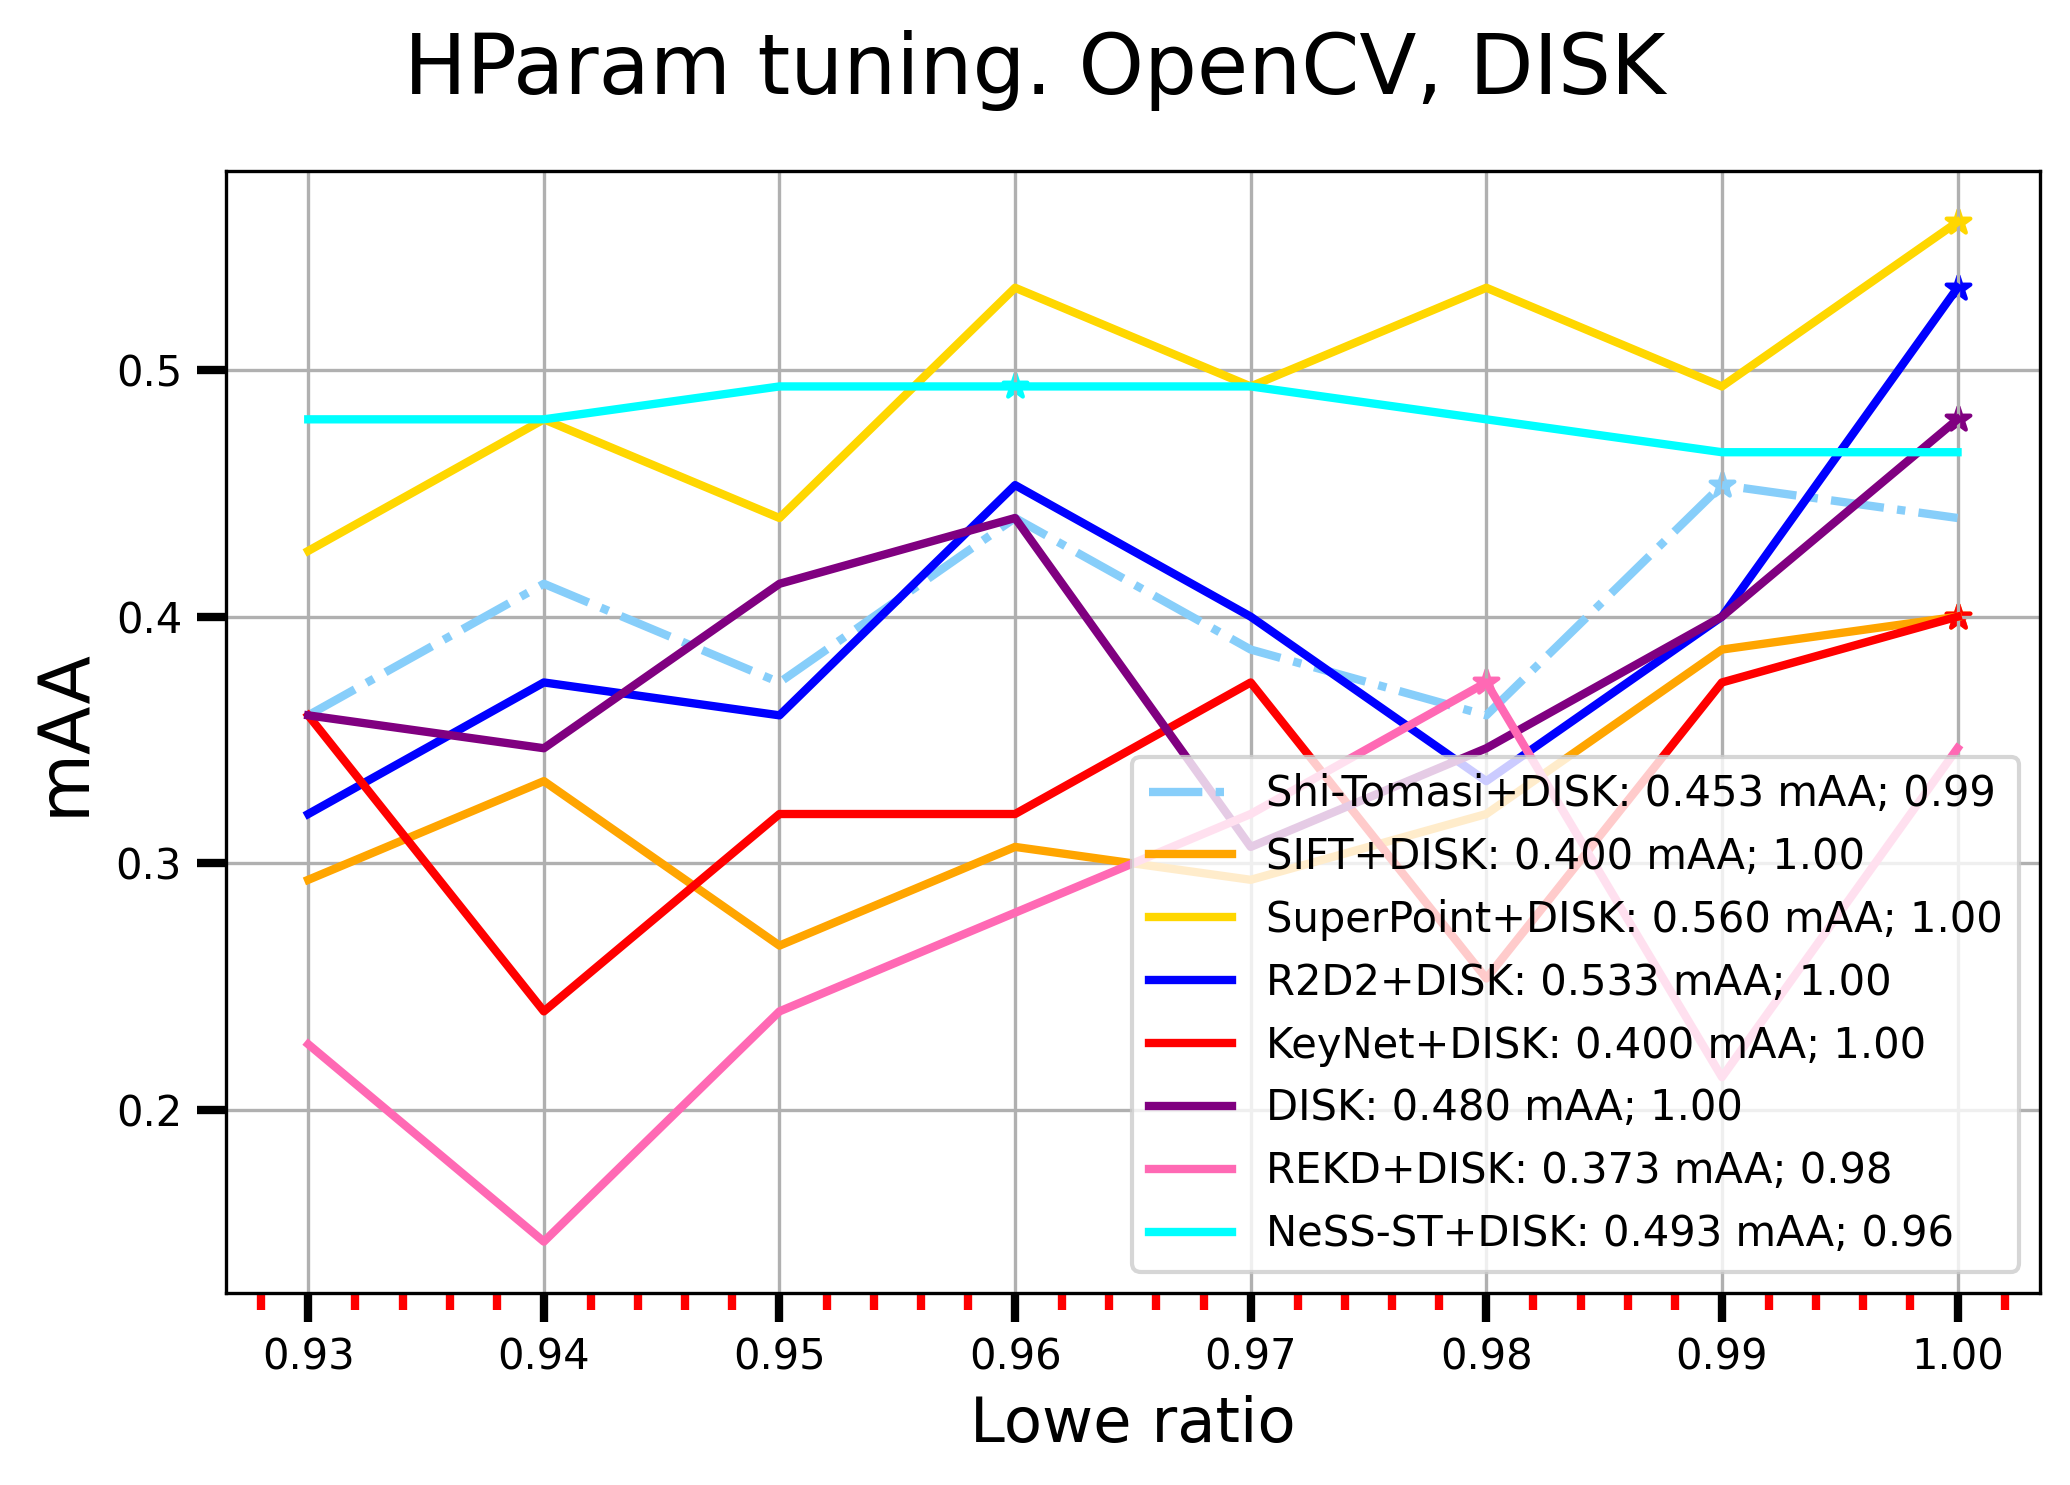

In [20]:
from source.evaluation.rel_pose.vis import HTuneRelPosemAAPlotter

HTuneRelPosemAAPlotter(methods_list,
                       eva_ns.LOWE_RATIO, 
                       hcr_mAA_list, thresh_list).plot_all(save)

In [21]:
from source.evaluation.rel_pose.vis import print_best_threshold

print_best_threshold(methods_list, eva_ns.LOWE_RATIO,
                     hcr_mAA_list, thresh_list)

HParam tuning. OpenCV, DISK
	 Shi-Tomasi+DISK: Lowe ratio is 0.99.
	 HCR: 0.453 mAA

	 SIFT+DISK: Lowe ratio is 1.0.
	 HCR: 0.400 mAA

	 SuperPoint+DISK: Lowe ratio is 1.0.
	 HCR: 0.560 mAA

	 R2D2+DISK: Lowe ratio is 1.0.
	 HCR: 0.533 mAA

	 KeyNet+DISK: Lowe ratio is 1.0.
	 HCR: 0.400 mAA

	 DISK: Lowe ratio is 1.0.
	 HCR: 0.480 mAA

	 REKD+DISK: Lowe ratio is 0.98.
	 HCR: 0.373 mAA

	 NeSS-ST+DISK: Lowe ratio is 0.96.
	 HCR: 0.493 mAA



### Inlier threshold tuning

In [22]:
from source.evaluation.rel_pose.logging import load_rel_pose_htune

hcr_mAA_list, thresh_list = load_rel_pose_htune(htune_dir, evaluation_task,
                                                methods_list,
                                                eva_ns.INL_THRESH)

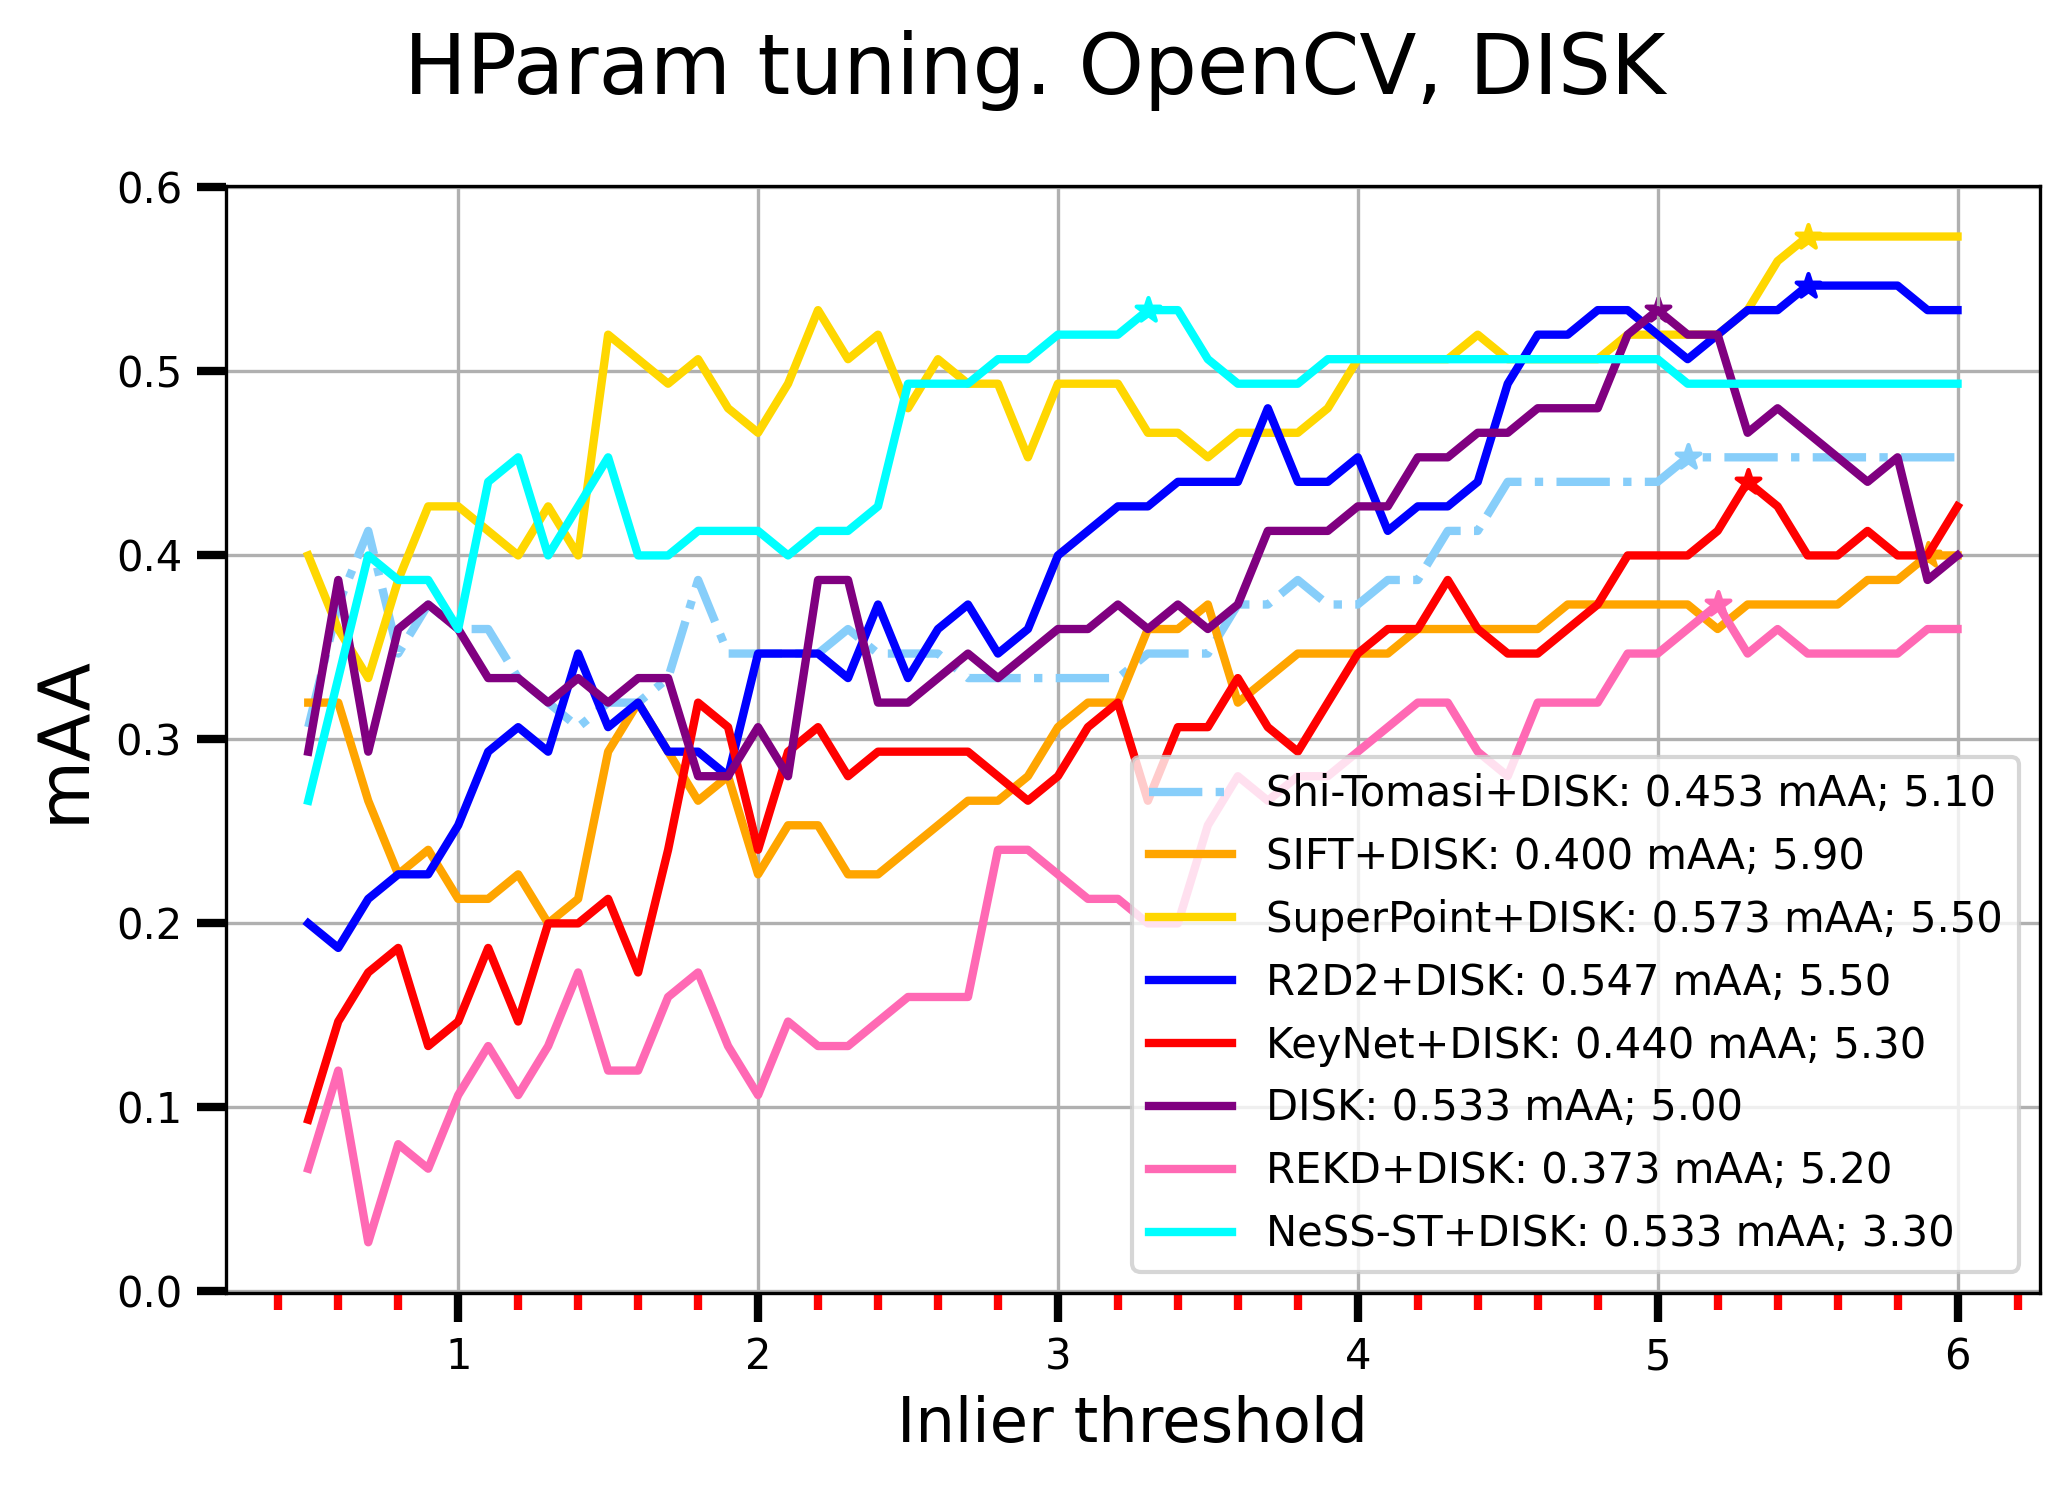

In [23]:
from source.evaluation.rel_pose.vis import HTuneRelPosemAAPlotter

HTuneRelPosemAAPlotter(methods_list,
                       eva_ns.INL_THRESH,
                       hcr_mAA_list, thresh_list).plot_all(save)

In [24]:
from source.evaluation.rel_pose.vis import print_best_threshold

print_best_threshold(methods_list, eva_ns.INL_THRESH,
                     hcr_mAA_list, thresh_list)

HParam tuning. OpenCV, DISK
	 Shi-Tomasi+DISK: Inlier threshold is 5.1.
	 HCR: 0.453 mAA

	 SIFT+DISK: Inlier threshold is 5.9.
	 HCR: 0.400 mAA

	 SuperPoint+DISK: Inlier threshold is 5.5.
	 HCR: 0.573 mAA

	 R2D2+DISK: Inlier threshold is 5.5.
	 HCR: 0.547 mAA

	 KeyNet+DISK: Inlier threshold is 5.3.
	 HCR: 0.440 mAA

	 DISK: Inlier threshold is 5.0.
	 HCR: 0.533 mAA

	 REKD+DISK: Inlier threshold is 5.2.
	 HCR: 0.373 mAA

	 NeSS-ST+DISK: Inlier threshold is 3.3.
	 HCR: 0.533 mAA

